In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Фазовые диаграммы (нафталин-дифениламин)

In [3]:
data = {'T crit. (C)':[80.2, 69, 56.5, 45, 36, 44, 52.5, 59],
        'm%, НФ':[100, 80, 65, 50, 40, 10, 0, np.nan],
        'mol%, НФ':[1.0, 0.8491, 0.7101, 0.5693, 0.4678, 0.1271, 0, np.nan]}
index = list(range(7))
index.append('control')
df = pd.DataFrame(data=data, index=index)

#### Таблица 1. Координаты кривой ликвидуса.

In [4]:
df

,T crit. (C),"m%, НФ","mol%, НФ"
0,80.2,100.0,1.0000
1,69.0,80.0,0.8491
2,56.5,65.0,0.7101
3,45.0,50.0,0.5693
4,36.0,40.0,0.4678
5,44.0,10.0,0.1271
6,52.5,0.0,0.0000
control,59.0,NaN,NaN


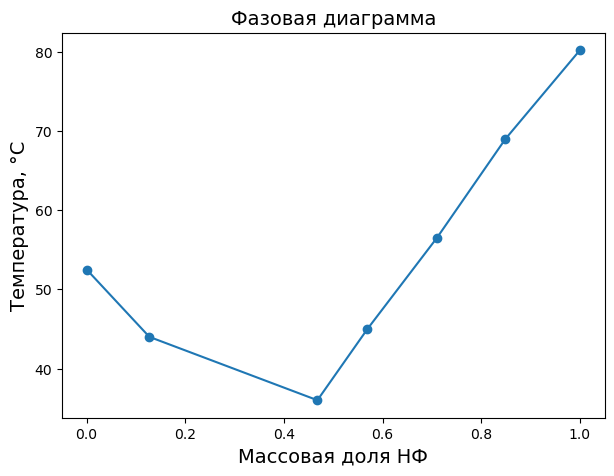

In [5]:
plt.figure(figsize=(7,5))
plt.plot(
    df["mol%, НФ"],
    df["T crit. (C)"],
    marker='o'
)

plt.title("Фазовая диаграмма", fontsize=14)
plt.ylabel("Температура, °C", fontsize=14)
plt.xlabel("Массовая доля НФ", fontsize=14)
plt.show()